In [36]:
%pylab notebook
import os, sys, importlib
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')
import pandas as pd, numpy as np, scipy as scp , seaborn as sns
import hts_fitting as hts, default_figure_style as dfs, hts_dosecalculations as dose, hts_fitfunctions as ff, hts_misc as misc

for lib in [hts, ff, dfs, misc, dose]:
    importlib.reload(lib)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Check the IVs

<IPython.core.display.Javascript object>


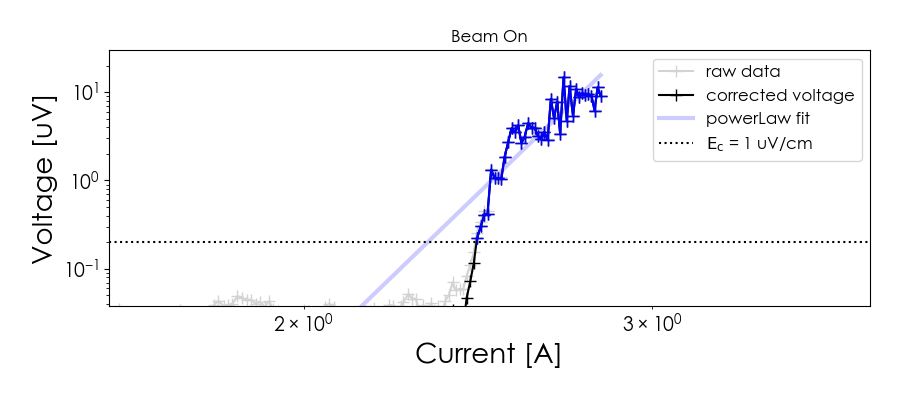

IntText(value=1, description='IV#:')

/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:93: RuntimeWarning: invalid value encountered in log
  current, voltage = np.log(current), np.log(voltage)
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitfunctions.py:32: RuntimeWarning: invalid value encountered in power
  return 2e-7*(i/ic)**n
/Users/alexisdevitre/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


40.0 39.0


<IPython.core.display.Javascript object>


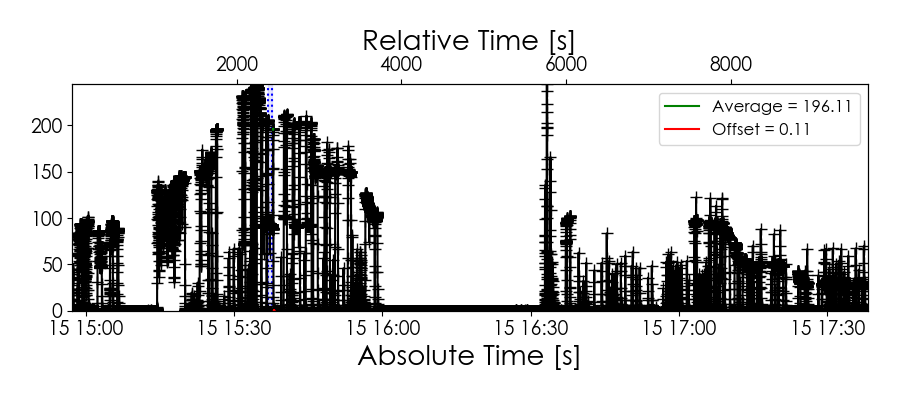

2024-03-15 14:57:13 2024-03-15 17:38:14


5.0 3.0


/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:93: RuntimeWarning: invalid value encountered in log
  current, voltage = np.log(current), np.log(voltage)
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:171: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


In [38]:
##################################################################
# Change this to select a suspicious row
# This index is adjusted to match the row indices of master.xlsx
##################################################################

i = 493 #489, [680, 681, 682],

##################################################################
##################################################################

# Collect the necessary data
cols = [0, 3, 4, 5, 6, 7, 15, 16, 17, 18]

names = [
    'tapeid',     # tape sample name
    'sname',      # sheet name in spreadsheet with beam current data
    't0Beam',     # start time of interval for beam current evaluation
    't1Beam',     # stop time of interval for beam current evaluation
    't0Offset',   # start time of interval for beam current offset evaluation
    't1Offset',    # stop time of interval for beam current offset evaluation
    'f0',
    'foff',
    'fon',
    'feq'    
]
dfrow = pd.read_excel(dfs.master, usecols=cols, names=names, skiprows=1).iloc[i-3]


# Check the IVs
path = '../data/Ic/{0}/'.format(dfrow.tapeid)
fpaths = [path+f for f in [dfrow.f0, dfrow.fon, dfrow.foff, dfrow.feq]]
hts.showcaseIVs(fpaths, style='loglog', titles=['Pristine tape', 'Beam On', 'Beam Off', 'Beam On Equivalent'])


# Check the beam current averages
ibpath = '../data/flux/{0}.xlsx'.format(dfrow.tapeid)
sname = '{}'.format(dfrow.sname)

_, axrt, _, data = dose.plotBeamCurrentWithMeasurements([fpaths[1]], ibpath, sname)
cut = (1996 <= data.time_s)&(data.time_s <= 1998)
data.ibeam_nA[cut].mean()

cut = (dfrow.t0Beam <= data.time_s) & (data.time_s <= dfrow.t1Beam)
axrt.plot(data.time_s[cut], data.ibeam_nA[cut], color='green', label='Average = {:4.2f}'.format(data.ibeam_nA[cut].mean()))

cut = (dfrow.t0Offset <= data.time_s) & (data.time_s <= dfrow.t1Offset)
axrt.plot(data.time_s[cut], data.ibeam_nA[cut], color='red', label='Offset = {:4.2f}'.format(data.ibeam_nA[cut].mean()))

axrt.legend()